# We will solve the Happy House problem where we allow a person to enter the house only if he/she is smiling! So, a smile detector!

In [ ]:
pip install pydot

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import scipy
import random
import seaborn as sns
import h5py

# load the dataset 

In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped 
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [3]:
X_train, Y_train, X_test, Y_test = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


### reshape data 

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(600, 64, 64, 3)
(1, 600)
(150, 64, 64, 3)
(1, 150)


In [5]:
Y_train = Y_train.reshape(600, 1)
Y_test = Y_test.reshape(150,1)
print(Y_train.shape)
print(Y_test.shape)

(600, 1)
(150, 1)


Shape of training dataset: (600, 64, 64, 3)



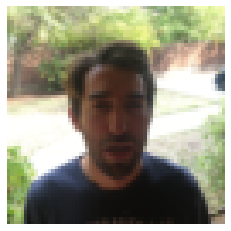

In [6]:
# Random image from the dataset 
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(f"Shape of training dataset: {X_train.shape}\n")

###  Build model 

In [32]:
model = Sequential()
model.add(Conv2D(filters=30, kernel_size = (3, 3), padding = "same", strides=(1,2), input_shape=(64, 64, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=30, kernel_size = (3, 3), padding = "same", strides=(1,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 32, 30)        840       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 8, 30)         8130      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 4, 30)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                122944    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)               

In [33]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=["accuracy"])

In [34]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=10,
                    epochs=40,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/40
48/48 [==============================] - 1s 13ms/step - loss: 0.6998 - accuracy: 0.4875 - val_loss: 0.6956 - val_accuracy: 0.4500
Epoch 2/40
48/48 [==============================] - 1s 12ms/step - loss: 0.6916 - accuracy: 0.5208 - val_loss: 0.6839 - val_accuracy: 0.8500
Epoch 3/40
48/48 [==============================] - 1s 12ms/step - loss: 0.6545 - accuracy: 0.6458 - val_loss: 0.6825 - val_accuracy: 0.4500
Epoch 4/40
48/48 [==============================] - 1s 12ms/step - loss: 0.5490 - accuracy: 0.7396 - val_loss: 0.4734 - val_accuracy: 0.7417
Epoch 5/40
48/48 [==============================] - 1s 12ms/step - loss: 0.3519 - accuracy: 0.8313 - val_loss: 0.2547 - val_accuracy: 0.8917
Epoch 6/40
48/48 [==============================] - 1s 12ms/step - loss: 0.2728 - accuracy: 0.8813 - val_loss: 0.1986 - val_accuracy: 0.9167
Epoch 7/40
48/48 [==============================] - 1s 12ms/step - loss: 0.2128 - accuracy: 0.9167 - val_loss: 0.1638 - val_accuracy: 0.9500
Epoch 8/40
48

<function matplotlib.pyplot.show(close=None, block=None)>

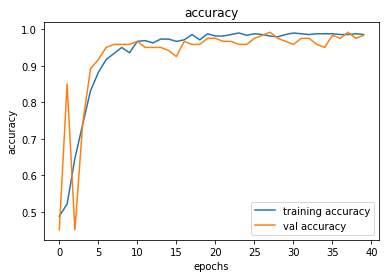

In [35]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

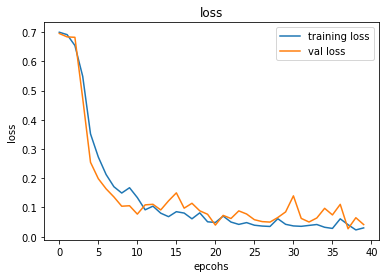

In [36]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('loss')
plt.xlabel('epcohs')
plt.ylabel('loss')
plt.legend()
plt.show()